# Second order visualizations
Test code for generating second order visualizations of desired sites and exporting to a folder. Exports rFon1, rFon1D barplots and rFon2D heatmaps.

Last updated: Wednesday July 27, 2022

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from math import comb
from os.path import exists

## User Input (specific to dataset of interest)
This first box is all that you need to adjust.

In [2]:
# file information
data_file_prefix = 'amyloid_gk_nostop'
ortho_seq_file_prefix = 'gk_polarity_second0'

# location information
run_location = 'local' # or server. where are you running the code?
ortho_results_location = 'server' # or local (are the ortho_seqs results in local or server?)

# dataset information
n_sites = 7
dims = ['NP', 'P']
n_dim = len(dims)
site_desc = 'Gatekeeper sites' # how you want the x-axis of the sites to be labeled
phenotype = 'nscore'

In [3]:
if run_location == 'local':
    ortho_dir = '/Users/olivia.yoo/Desktop/code/ortho_seqs/'
elif run_location == 'server':
    ortho_dir = '/hpc/projects/data_lg/olivia.yoo/ortho_seqs/'
else:
    print("Specify the location where you're running this code as either local or server in the run_location variable.")

print(ortho_dir)
print(f"Path to the ortho_seqs directory exists: {exists(ortho_dir)}")

/Users/olivia.yoo/Desktop/code/ortho_seqs/
Path to the ortho_seqs directory exists: True


In [4]:
# TODO: CREATE OUT_DIR WITH UTILS FUNCTION
out_dir = ortho_dir + 'amyloid_beta/' + run_location + '_ortho_seq_results/' + ortho_seq_file_prefix + '_viz/'

# MANUALLY SET OUT_DIR FOR NOW
out_dir = ortho_dir + 'amyloid_beta/' + 'add_later_results/gk_polarity_second/'

print(out_dir)
print(f"Path to the ortho_seqs directory exists: {exists(out_dir)}")

/Users/olivia.yoo/Desktop/code/ortho_seqs/amyloid_beta/add_later_results/gk_polarity_second/
Path to the ortho_seqs directory exists: True


## Import data
Looking at what's inside all of the numpy files generated by running the second order orthogonal-polynomial command.

In [5]:
data_path = ortho_dir + 'amyloid_beta/' + ortho_results_location + '_ortho_seq_results/' + ortho_seq_file_prefix + '/'  
print(data_path)
print(f"Path to the ortho_seqs results (data) directory exists: {exists(data_path)}")

/Users/olivia.yoo/Desktop/code/ortho_seqs/amyloid_beta/server_ortho_seq_results/gk_polarity_second0/
Path to the ortho_seqs results (data) directory exists: True


In [6]:
calculations = np.load(data_path + data_file_prefix + '.npz')
lst = calculations.files
for item in lst:
    print(item)

amyloid_gk_nostop_mean
amyloid_gk_nostop_P
amyloid_gk_nostop_var
amyloid_gk_nostop_cov
amyloid_gk_nostop_reg11
amyloid_gk_nostop_Pa
amyloid_gk_nostop_P1i1
amyloid_gk_nostop_varP1i1
amyloid_gk_nostop_cov11i1
amyloid_gk_nostop_reg11i1
amyloid_gk_nostop_Pa1i1
amyloid_gk_nostop_P1D
amyloid_gk_nostop_varP1D
amyloid_gk_nostop_phi2
amyloid_gk_nostop_phi2m
amyloid_gk_nostop_Q2
amyloid_gk_nostop_cov2w1
amyloid_gk_nostop_cov2w1a
amyloid_gk_nostop_cov2w1b
amyloid_gk_nostop_r2on1a
amyloid_gk_nostop_r2on1b
amyloid_gk_nostop_P2
amyloid_gk_nostop_P2a
amyloid_gk_nostop_cov2w2
amyloid_gk_nostop_var2
amyloid_gk_nostop_reg2on2
amyloid_gk_nostop_P2i2
amyloid_gk_nostop_P2i2a
amyloid_gk_nostop_cov2w2i2
amyloid_gk_nostop_var2i2
amyloid_gk_nostop_reg2on2i2
amyloid_gk_nostop_P2D
amyloid_gk_nostop_P2Da
amyloid_gk_nostop_var2D


In [7]:
calculations = np.load(data_path + "amyloid_gk_nostop.npz")

lst = calculations.files

for item in lst:
    print(item)

amyloid_gk_nostop_mean
amyloid_gk_nostop_P
amyloid_gk_nostop_var
amyloid_gk_nostop_cov
amyloid_gk_nostop_reg11
amyloid_gk_nostop_Pa
amyloid_gk_nostop_P1i1
amyloid_gk_nostop_varP1i1
amyloid_gk_nostop_cov11i1
amyloid_gk_nostop_reg11i1
amyloid_gk_nostop_Pa1i1
amyloid_gk_nostop_P1D
amyloid_gk_nostop_varP1D
amyloid_gk_nostop_phi2
amyloid_gk_nostop_phi2m
amyloid_gk_nostop_Q2
amyloid_gk_nostop_cov2w1
amyloid_gk_nostop_cov2w1a
amyloid_gk_nostop_cov2w1b
amyloid_gk_nostop_r2on1a
amyloid_gk_nostop_r2on1b
amyloid_gk_nostop_P2
amyloid_gk_nostop_P2a
amyloid_gk_nostop_cov2w2
amyloid_gk_nostop_var2
amyloid_gk_nostop_reg2on2
amyloid_gk_nostop_P2i2
amyloid_gk_nostop_P2i2a
amyloid_gk_nostop_cov2w2i2
amyloid_gk_nostop_var2i2
amyloid_gk_nostop_reg2on2i2
amyloid_gk_nostop_P2D
amyloid_gk_nostop_P2Da
amyloid_gk_nostop_var2D


In [8]:
regressions = np.load(data_path + data_file_prefix + '_regressions.npz')
lst = regressions.files
for item in lst:
    print(item)

amyloid_gk_nostop_rFon1
amyloid_gk_nostop_rFon1D
amyloid_gk_nostop_rFon2i1
amyloid_gk_nostop_Fon1
amyloid_gk_nostop_Fon2i1
amyloid_gk_nostop_Fest
amyloid_gk_nostop_rFon2
amyloid_gk_nostop_rFon2D
amyloid_gk_nostop_Fon12
amyloid_gk_nostop_rFon12


In [9]:
covs = np.load(data_path + data_file_prefix + "_covs_with_F.npz")

lst = covs.files

for item in lst:
    print(item)

amyloid_gk_nostop_covFP[0]
amyloid_gk_nostop_cov1FP[1]
amyloid_gk_nostop_covFP[1]
amyloid_gk_nostop_covFw1i1
amyloid_gk_nostop_covFw2
amyloid_gk_nostop_covFw2D
amyloid_gk_nostop_covFw2i2
amyloid_gk_nostop_covFPP


In [10]:
Fm = np.load(data_path + data_file_prefix + "_Fm.npy")

print(Fm)

-0.22839209863017185


# First order regressions (rFon1 and rFon1D)

In [11]:
# rFon1 is the regression of the trait on each element of the first order phenotype vectors
rFon1 = regressions[data_file_prefix + "_rFon1"]
print(rFon1.shape) # (n_sites, n_dim)
rFon1

(7, 2)


array([[ 0.72506616, -0.72506616],
       [ 0.30860726, -0.30860726],
       [ 0.31728187, -0.31728187],
       [-0.07575775,  0.07575775],
       [ 0.19895609, -0.19895609],
       [-0.78332138,  0.78332138],
       [-0.54639057,  0.54639057]])

In [12]:
rFon1D = regressions[data_file_prefix + "_rFon1D"]
print(rFon1D.shape) # (n_sites, n_dim)
rFon1D

(7, 2)


array([[ 0.71653736, -0.71653736],
       [ 0.29365768, -0.29365768],
       [ 0.3173907 , -0.3173907 ],
       [-0.10559834,  0.10559834],
       [ 0.16798227, -0.16798227],
       [ 0.        ,  0.        ],
       [ 0.        ,  0.        ]])

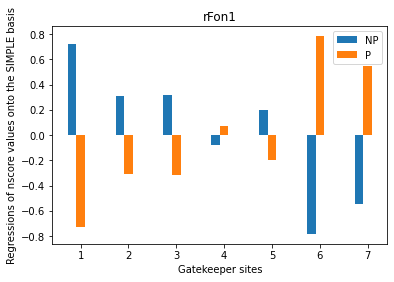

In [13]:
rFon1_flat = list(rFon1.flatten())
ind = np.arange(n_sites) # x-axis
width = 0.18 # unsure why this value?

# generate y values
sitesxdim = n_sites * n_dim
y_vals = []
for i in range(n_dim):
    curr_y = [rFon1_flat[j] for j in range(i, sitesxdim, n_dim)]
    y_vals.append(curr_y)

# generate figure
fig, ax = plt.subplots()

bars = []
for i in range(n_dim):
    curr_bar = ax.bar(ind + i * width, y_vals[i], width)
    bars.append(curr_bar)

ax.set_xticks(ind + width)
ax.set_xticklabels(np.arange(1,n_sites + 1))

# generate legend
bar_legend = ()
for i in range(n_dim):
    bar_legend = bar_legend + (bars[i][0],)
ax.legend(bar_legend, dims)

# Title, Labels, etc.
plt.xlabel(site_desc)
y_label = 'Regressions of ' + phenotype + ' values onto the SIMPLE basis'
plt.ylabel(y_label)
plt.title('rFon1')

plt.savefig(out_dir + 'rFon1.png', dpi=400)

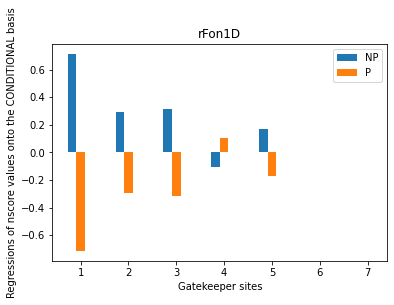

In [14]:
rFon1D_flat = list(rFon1D.flatten())
ind = np.arange(n_sites) # x-axis
width = 0.18 # unsure why this value?

# generate y values
sitesxdim = n_sites * n_dim
y_vals = []
for i in range(n_dim):
    curr_y = [rFon1D_flat[j] for j in range(i, sitesxdim, n_dim)]
    y_vals.append(curr_y)

# generate figure
fig, ax = plt.subplots()

bars = []
for i in range(n_dim):
    curr_bar = ax.bar(ind + i * width, y_vals[i], width)
    bars.append(curr_bar)

ax.set_xticks(ind + width)
ax.set_xticklabels(np.arange(1,n_sites + 1))

# generate legend
bar_legend = ()
for i in range(n_dim):
    bar_legend = bar_legend + (bars[i][0],)
ax.legend(bar_legend, dims)

# Title, Labels, etc.
plt.xlabel(site_desc)
y_label = 'Regressions of ' + phenotype + ' values onto the CONDITIONAL basis'
plt.ylabel(y_label)
plt.title('rFon1D')
plt.savefig(out_dir + 'rFon1D.png', dpi=400)

## Second order regressions (rFon2D)

In [15]:
rFon2D = regressions[data_file_prefix + "_rFon2D"]
print(rFon2D.shape) # (n_sites, n_sites, n_dim, n_dim)
rFon2D

(7, 7, 2, 2)


array([[[[   0.        ,    0.        ],
         [   0.        ,    0.        ]],

        [[ -11.82920333,   11.82920333],
         [  11.82920333,  -11.82920333]],

        [[  -0.66694528,    0.66694528],
         [ -21.56952904,   21.56952904]],

        [[  -0.54846937,    0.54846937],
         [ -26.9619113 ,   26.9619113 ]],

        [[  13.07274903,  -13.07274903],
         [ -13.68985745,   13.68985745]],

        [[  -7.05172528,    7.05172528],
         [   8.39861053,   -8.39861053]],

        [[   6.27513836,   -6.27513836],
         [  -6.67213851,    6.67213851]]],


       [[[ -11.82920333,   11.82920333],
         [  11.82920333,  -11.82920333]],

        [[   0.        ,    0.        ],
         [   0.        ,    0.        ]],

        [[  -0.6627306 ,    0.6627306 ],
         [ -27.15448303,   27.15448303]],

        [[  -0.54839026,    0.54839026],
         [ -27.15448303,   27.15448303]],

        [[  13.06852473,  -13.06852473],
         [ -13.68522499,   13.685

In [16]:
# to look at a pair of sites, rFon2D[site 1][site 2] = shape (n_dim, n_dim)
rFon2D[0][0]

array([[0., 0.],
       [0., 0.]])

In [17]:
# extract all of the rFon2D pairs of unique sites and concatenate them
n_pairs = comb(n_sites, 2)
print(n_pairs)

unique_rFon2D = []
pairs_list = []

for i in range(n_sites):
    for j in range(n_sites):
        if j > i:
            pairs_list.append((i, j))
            this_rFon2D = rFon2D[i][j]
            unique_rFon2D.append(this_rFon2D)
            
concat = np.concatenate(unique_rFon2D)
concat.shape # should be (n_pairs * n_dim, n_dim)

21


(42, 2)

In [18]:
abs_max_val = abs(concat.max())
abs_max_val

62.311342119490305

In [19]:
# scale each value in each of the matrices above by the max_val
scaled_rFon2D = []

for i in range(n_pairs):
    scaled = unique_rFon2D[i] * (1 / abs_max_val)
    scaled_rFon2D.append(scaled)

### Look at a specific 2nd order interaction (heatmap) between two sites

In [20]:
# CHOOSE SITE PAIR OF INTEREST
first_site = 3
second_site = 2

In [21]:
if first_site < second_site:
    pair = pairs_list.index((first_site, second_site))
    smaller_site = first_site
    larger_site = second_site
elif first_site > second_site:
    pair = pairs_list.index((second_site, first_site))
    smaller_site = second_site
    larger_site = first_site
else:
    print("pairs have to be different numbers")

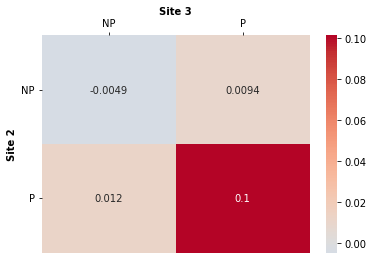

In [22]:
ax = sns.heatmap(scaled_rFon2D[pair], annot=True, cmap='coolwarm', annot_kws={"size": 10}, center=0, square=False)
column_labels = dims
row_labels = dims
plt.yticks(rotation=0)
ax.set_xticklabels(column_labels, minor=False)
ax.set_yticklabels(row_labels, minor=False)
ax.set_xlabel(f'Site {larger_site}', weight='bold') # Larger site
ax.xaxis.set_label_position('top')
ax.set_ylabel(f'Site {smaller_site}', weight='bold') # Smaller site
ax.xaxis.tick_top()
figure = ax.get_figure()

In [23]:
scaled_rFon2D[pair]

array([[-0.00494159,  0.00942976],
       [ 0.01156826,  0.10128252]])

### Generate and save all second order interactions (heatmaps).

/var/folders/zb/wggq66s94jjdy4wx3vr2gnt00000gq/T/ipykernel_75527/4211883761.py:8: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()


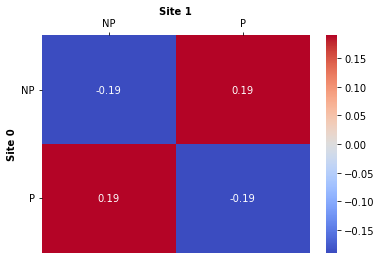

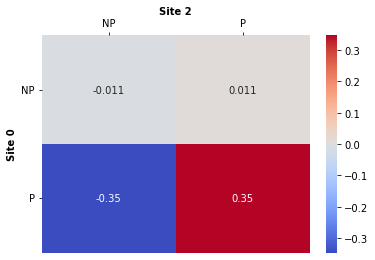

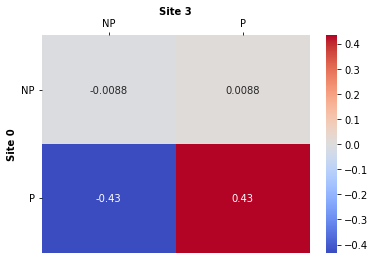

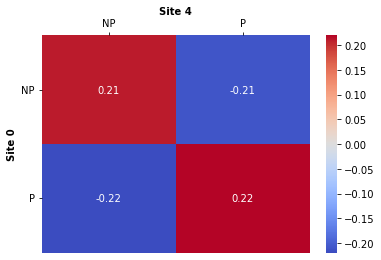

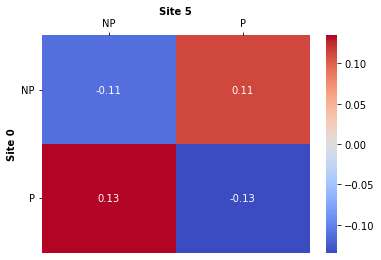

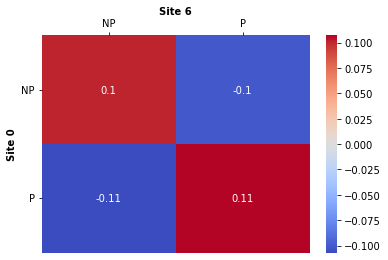

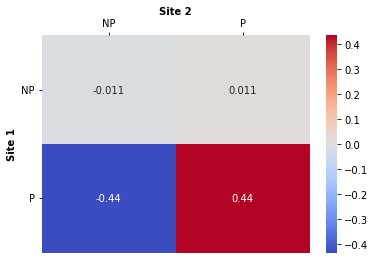

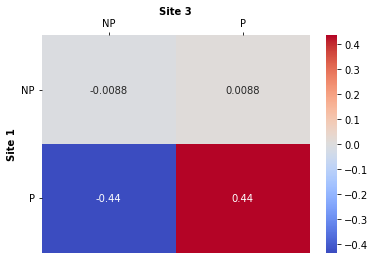

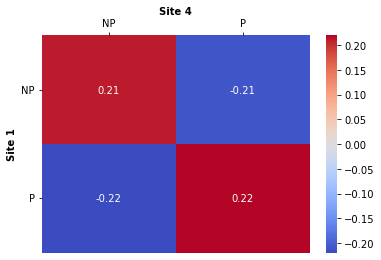

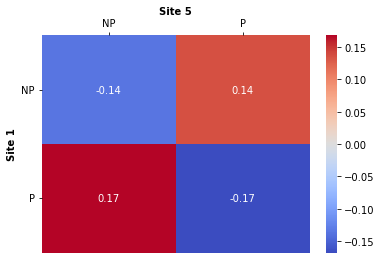

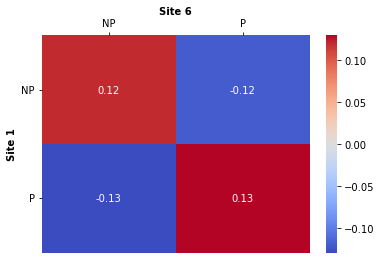

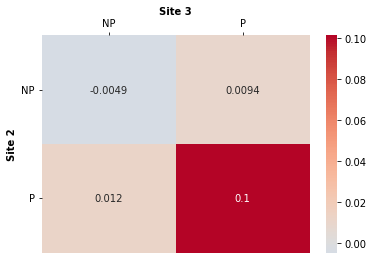

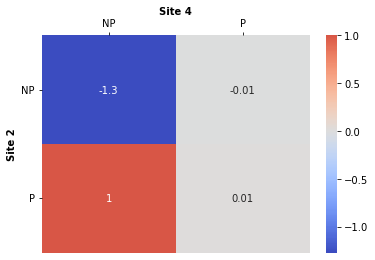

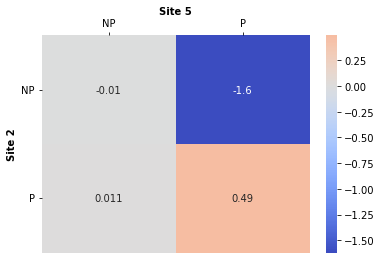

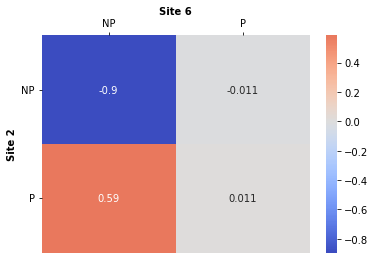

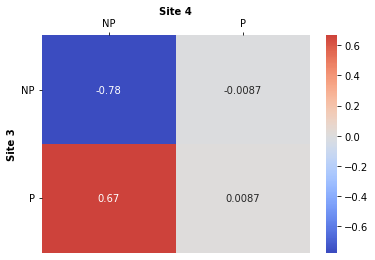

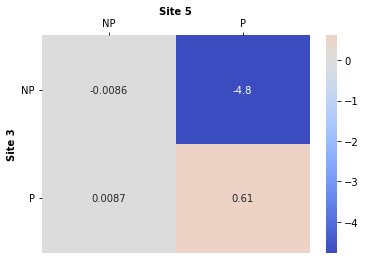

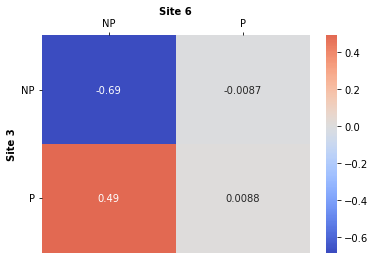

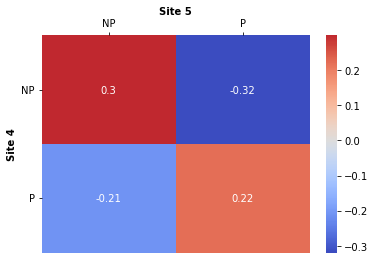

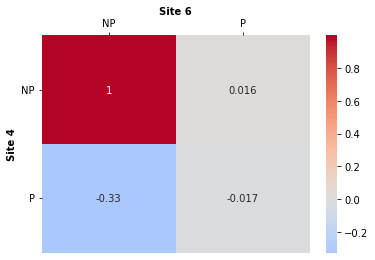

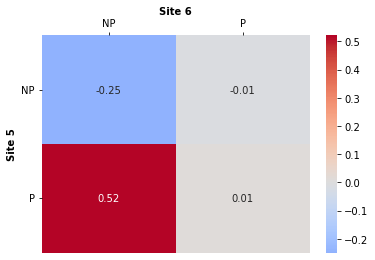

In [24]:
for i in range(n_pairs):
    # pick the pair
    curr_pair = pairs_list[i]
    smaller_site = curr_pair[0]
    larger_site = curr_pair[1]
    
    # generate the figure
    plt.figure()
    ax = sns.heatmap(scaled_rFon2D[i], annot=True, cmap='coolwarm', annot_kws={"size": 10}, center=0, square=False)
    column_labels = dims
    row_labels = dims
    plt.yticks(rotation=0)
    ax.set_xticklabels(column_labels, minor=False)
    ax.set_yticklabels(row_labels, minor=False)
    ax.set_xlabel(f'Site {larger_site}', weight='bold') # Larger site
    ax.xaxis.set_label_position('top')
    ax.set_ylabel(f'Site {smaller_site}', weight='bold') # Smaller site
    ax.xaxis.tick_top()
    figure = ax.get_figure()
    
    # save the figure
    figure_title = 'site' + str(smaller_site) + 'w' + str(larger_site) + '_scaled.png'
    figure.savefig(out_dir + figure_title, dpi=400)